# MGTA 415 - Session 1 Demo: Text Vectorization

## Bag of Words

In [1]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ["The cat sat on the mat.", "The dog barked at the cat."]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(X.toarray())
print(vectorizer.get_feature_names_out())


[[0 0 1 0 1 1 1 2]
 [1 1 1 1 0 0 0 2]]
['at' 'barked' 'cat' 'dog' 'mat' 'on' 'sat' 'the']


## TF-IDF (Term Frequency-Inverse Document Frequency)

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample text data
corpus = [
    "The cat sat on the mat.",
    "The dog sat on the mat.",
    "The cat and the dog sat on the mat."
]

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the text data
tfidf_matrix = vectorizer.fit_transform(corpus)

# Convert the TF-IDF matrix to a dense format and print
print(tfidf_matrix.toarray())

# Get feature names
print(vectorizer.get_feature_names_out())


[[0.         0.43761956 0.         0.33985062 0.33985062 0.33985062
  0.67970125]
 [0.         0.         0.43761956 0.33985062 0.33985062 0.33985062
  0.67970125]
 [0.39706533 0.30197842 0.30197842 0.23451318 0.23451318 0.23451318
  0.70353955]]
['and' 'cat' 'dog' 'mat' 'on' 'sat' 'the']


## Word Embeddings: Word2Vec

### Expected Output
- **Vector for 'bank'**: A 50-dimensional vector representing the word "bank".
- **Words similar to 'bank'**: You should see words like "river" and "deposit" appear close to "bank" due to the different contexts in which "bank" is used.

### Enhanced Contextual Explanation
- **"Bank" (Financial Institution)**: Expected similar words: "deposit", "withdraw", "cash", "account"
- **"Bank" (Riverbank)**:Expected similar words: "river", "grassy", "flowers", "played"

In [7]:
import nltk
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Download necessary NLTK data
nltk.download('punkt')

# Example sentences
sentences = [
    "He went to the bank to deposit his money.",
    "The river bank was full of blooming flowers.",
    "She needs to go to the bank to withdraw some cash.",
    "The children played by the river bank all afternoon.",
    "The bank offers several types of accounts.",
    "They had a picnic on the grassy bank of the river."
]

# Tokenize the sentences
tokenized_sentences = [word_tokenize(sentence.lower()) for sentence in sentences]

# Train Word2Vec model
model = Word2Vec(tokenized_sentences, vector_size=50, window=5, min_count=1, workers=4)

# Get the vector representation of a word
word_vector = model.wv['bank']
print("Vector for 'bank':", word_vector)

# Find most similar words
similar_words = model.wv.most_similar('bank')
print("Words similar to 'bank':", similar_words)

Vector for 'bank': [-0.01724129  0.00733238  0.01038477  0.01148871  0.01493191 -0.01234301
  0.00222421  0.01210183 -0.00568457 -0.0123484  -0.00081764 -0.0167471
 -0.01120381  0.0142049   0.00670135  0.01445607  0.01360174  0.0150664
 -0.00758315 -0.00113714  0.00470511 -0.00902721  0.01678618 -0.01971861
  0.01353026  0.00583209 -0.0098623   0.00880152 -0.00348433  0.01341619
  0.01991924 -0.00872594 -0.00119171 -0.0113931   0.00769561  0.0055755
  0.01379505  0.01219697  0.01907781  0.01855094  0.01580094 -0.01397647
 -0.01831637 -0.00071307 -0.0061837   0.01579634  0.01186717 -0.00309394
  0.0030315   0.00358765]
Words similar to 'bank': [('he', 0.24883128702640533), ('go', 0.1962825506925583), ('of', 0.1657898724079132), ('grassy', 0.1553666591644287), ('deposit', 0.14426200091838837), ('had', 0.14404766261577606), ('types', 0.14349131286144257), ('flowers', 0.139323428273201), ('by', 0.12979109585285187), ('the', 0.12721727788448334)]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Visualizing Word Embeddings
Visualizing word embeddings can help understand the relationships between words. Common techniques include PCA (Principal Component Analysis) and t-SNE (t-distributed Stochastic Neighbor Embedding).

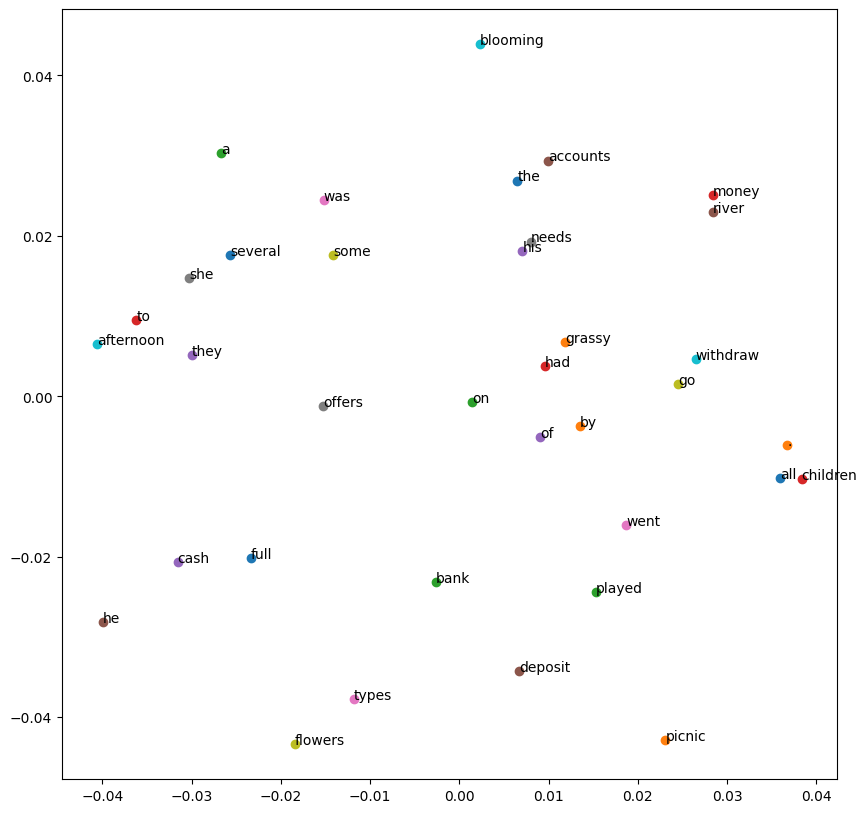

In [8]:
# Visualize word embeddings using PCA
words = list(model.wv.index_to_key)
word_vectors = [model.wv[word] for word in words]

# Reduce dimensions using PCA
pca = PCA(n_components=2)
word_vectors_pca = pca.fit_transform(word_vectors)

# Plot the word vectors
plt.figure(figsize=(10, 10))
for i, word in enumerate(words):
    plt.scatter(word_vectors_pca[i, 0], word_vectors_pca[i, 1])
    plt.annotate(word, xy=(word_vectors_pca[i, 0], word_vectors_pca[i, 1]))
plt.show()
